In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [21]:
import os
# Define the paths to training and validation data
train_data_dir = 'dataset_mata'
validation_data_dir = 'dataset_mata'

def list_images(directory):
    print(f"Listing images in directory: {directory}")
    for root, dirs, files in os.walk(directory):
        print(f"\nDirectory: {root}")
        for filename in files:
            if filename.endswith('.JPG') or filename.endswith('.jpg'):
                print("Found image:", filename)
            else:
                print("Non-image file:", filename)

# Check training directory
list_images(train_data_dir)

# Check validation directory
list_images(validation_data_dir)

# Set image size, batch size, and other parameters
img_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalizing images
    rotation_range=20,    # Randomly rotate images by 20 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented images
train_data = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Use 'binary' for binary classification
)

validation_data = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Listing images in directory: dataset_mata

Directory: dataset_mata

Directory: dataset_mata\A
Found image: IMG_9571.JPG
Found image: IMG_9572.JPG
Found image: IMG_9573.JPG
Found image: IMG_9574.JPG
Found image: IMG_9575.JPG
Found image: IMG_9576.JPG
Found image: IMG_9578.JPG
Found image: IMG_9579.JPG
Found image: IMG_9580.JPG
Found image: IMG_9581.JPG
Found image: IMG_9582.JPG
Found image: IMG_9583.JPG
Found image: IMG_9584.JPG
Found image: IMG_9585.JPG
Found image: IMG_9586.JPG
Found image: IMG_9587.JPG
Found image: IMG_9588.JPG
Found image: IMG_9589.JPG
Found image: IMG_9590.JPG
Found image: IMG_9591.JPG
Found image: IMG_9592.JPG
Found image: IMG_9593.JPG
Found image: IMG_9594.JPG
Found image: IMG_9595.JPG
Found image: IMG_9596.JPG
Found image: IMG_9597.JPG
Found image: IMG_9598.JPG
Found image: IMG_9600.JPG
Found image: IMG_9601.JPG
Found image: IMG_9603.JPG
Found image: IMG_9604.JPG
Found image: IMG_9605.JPG
Found image: IMG_9606.JPG
Found image: IMG_9607.JPG
Found image: IMG_9608.

In [34]:
num_classes = train_data.num_classes  # Automatically detects number of classes from the data

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust for your specific number of classes
])


In [35]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
    metrics=['accuracy']
)

In [36]:
epochs = 15  # Number of training epochs
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=validation_data
)


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 14s/step - accuracy: 0.5867 - loss: 1.0297 - val_accuracy: 0.3897 - val_loss: 0.7359
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 48s 10s/step - accuracy: 0.5851 - loss: 0.7086 - val_accuracy: 0.6103 - val_loss: 0.6698
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 49s 10s/step - accuracy: 0.6185 - loss: 0.6769 - val_accuracy: 0.6103 - val_loss: 0.6753
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 49s 10s/step - accuracy: 0.5904 - loss: 0.6774 - val_accuracy: 0.6103 - val_loss: 0.6686
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 48s 10s/step - accuracy: 0.6250 - loss: 0.6752 - val_accuracy: 0.6103 - val_loss: 0.6706
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 48s 12s/step - accuracy: 0.6653 - loss: 0.6442 - val_accuracy: 0.6103 - val_loss: 0.6646
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 48s 10s/step - accuracy: 0.6130 - loss: 0.6726 - val_accuracy: 0.6103 - val_loss: 0.6620
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 48s 10s/step - accuracy: 0.6384 - loss: 0.6608 - val_accuracy: 0.6103 - val_loss: 0.6753


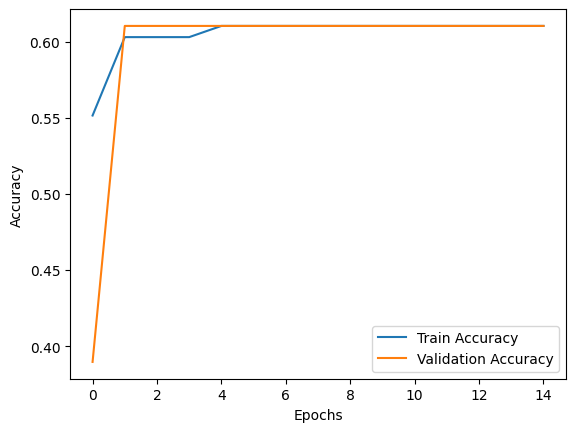

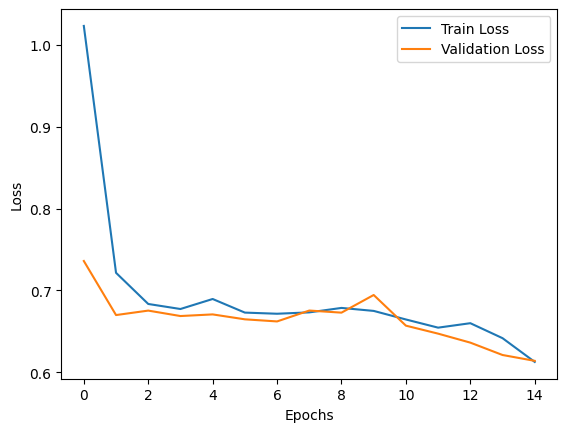

In [37]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [38]:
model.save('matagacor.h5')

In [39]:
import cv2
import numpy as np
import tensorflow as tf  # Make sure to import TensorFlow as well

# Load model for deployment
model = tf.keras.models.load_model('matagacor.h5')

# Set image size to match model input
img_size = (224, 224)
class_labels = ['Normal', 'Diseased']  # Adjust based on your model’s classes

# Load Haar Cascade for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Open a video capture object
cap = cv2.VideoCapture(2)  # Use 0 for the default camera

while True:
    ret, frame = cap.read()  # Capture frame-by-frame
    if not ret:
        break

    # Detect eyes in the frame
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert frame to grayscale for eye detection
    eyes = eye_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))

    # Draw rectangles around detected eyes
    for (x, y, w, h) in eyes:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue rectangle for eyes

        # Crop and preprocess eye region for prediction
        eye_region = frame[y:y+h, x:x+w]
        eye_resized = cv2.resize(eye_region, img_size)
        eye_normalized = eye_resized / 255.0  # Normalize
        eye_expanded = np.expand_dims(eye_normalized, axis=0)

        # Predict disease on the eye region
        predictions = model.predict(eye_expanded)
        class_idx = np.argmax(predictions)
        confidence = np.max(predictions)

        # Display label and confidence on the eye region
        label = f"{class_labels[class_idx]}: {confidence*100:.2f}%"
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Display the frame with eye detection and disease prediction
    cv2.imshow("Eye Disease Detection", frame)

    # Press 'q' to exit the video loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close the window
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━